## Regression Fundamentals Figures and Output

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binned_statistic

sns.set(rc = {'axes.titlesize': 24,
             'axes.labelsize': 20,
             'xtick.labelsize': 12,
             'ytick.labelsize': 12,
             'figure.figsize': (8, 4.5),
             'figure.dpi': 160})

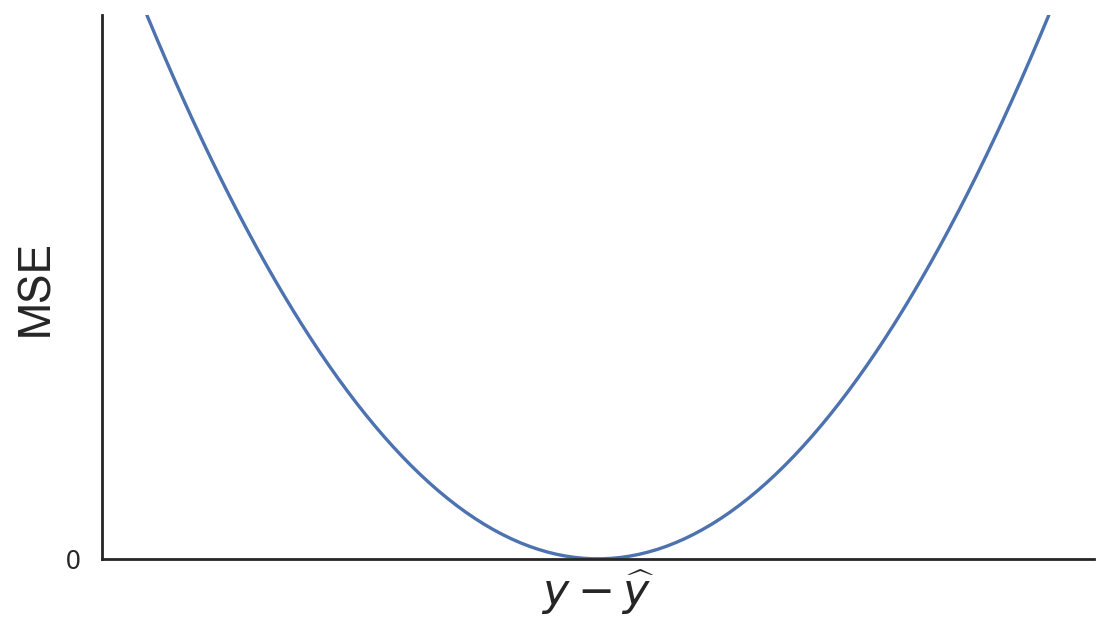

In [2]:
x = np.linspace(1, 5, 100)
y = (x-3)**2

sns.set_style('white')
fig = plt.plot(x, y)

plt.xticks([])
plt.yticks([0])
plt.ylabel('MSE')
plt.xlabel('$y-\\widehat{y}$')
# plt.vlines(3, 0, 5, linestyles = 'dashed', color = 'black')

plt.ylim(0, 4)
sns.despine()
plt.savefig('MSE')

In [3]:
hw = pd.read_csv('height_weight.csv', dtype = {'NHISPID': str})
hw.columns = hw.columns.str.lower()
hw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529320 entries, 0 to 529319
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       529320 non-null  int64  
 1   nhispid    529320 non-null  object 
 2   perweight  529320 non-null  int64  
 3   astatflg   190594 non-null  float64
 4   age        529320 non-null  int64  
 5   sex        529320 non-null  int64  
 6   height     412854 non-null  float64
 7   weight     412854 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 32.3+ MB


In [4]:
# Cleaning
hw = hw.loc[(hw.year == 2010) & (hw.height < 95) & (hw.height > 0)]

female = hw.loc[(hw.sex == 2) & (hw.weight > 100) & (hw.weight < 274)]
male   = hw.loc[(hw.sex == 1) & (hw.weight > 126) & (hw.weight < 299)]

In [5]:
# Setting up binned scatterplot
n = 50
# female
bin_mean_f, bin_edge_f, _ = binned_statistic(female.weight, female.height, bins = n)
bin_mean_m, bin_edge_m, _ = binned_statistic(male.weight,   male.height,   bins = n)

x_f = np.average([bin_edge_f[:-1], bin_edge_f[1:]], axis = 0)
x_m = np.average([bin_edge_m[:-1], bin_edge_m[1:]], axis = 0)

df = pd.DataFrame({'weight': x_f,
                   'height': bin_mean_f,
                   'gender': 'Female'}).append(
    pd.DataFrame({'weight': x_m,
                  'height': bin_mean_m,
                  'gender': 'Male'})).reset_index(drop = True)
print(df.head(2), '\n\n', df.tail(2))

   weight     height  gender
0  102.72  61.963415  Female
1  106.16  62.364780  Female 

     weight     height gender
98  292.87  69.333333   Male
99  296.29  71.461538   Male


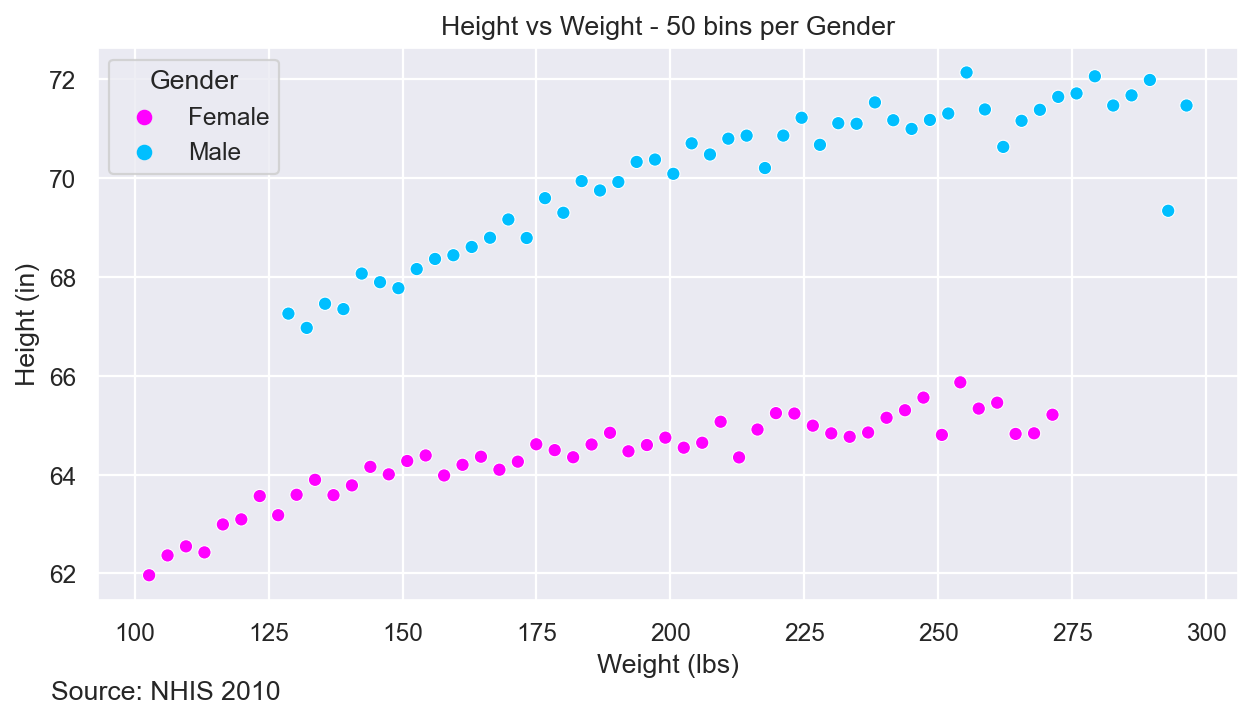

In [6]:
sns.set_theme()

palette = {'Male': 'deepskyblue', 'Female': 'magenta'}

fig = plt.figure()
sns.scatterplot(data = df, x = 'weight', y = 'height', hue = 'gender', palette = palette)
plt.legend(title = 'Gender')

plt.title('Height vs Weight - 50 bins per Gender')
fig.text(0.05, 0.01, 'Source: NHIS 2010', ha='left')
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (in)')

plt.tight_layout()

plt.savefig('height vs weight fm')

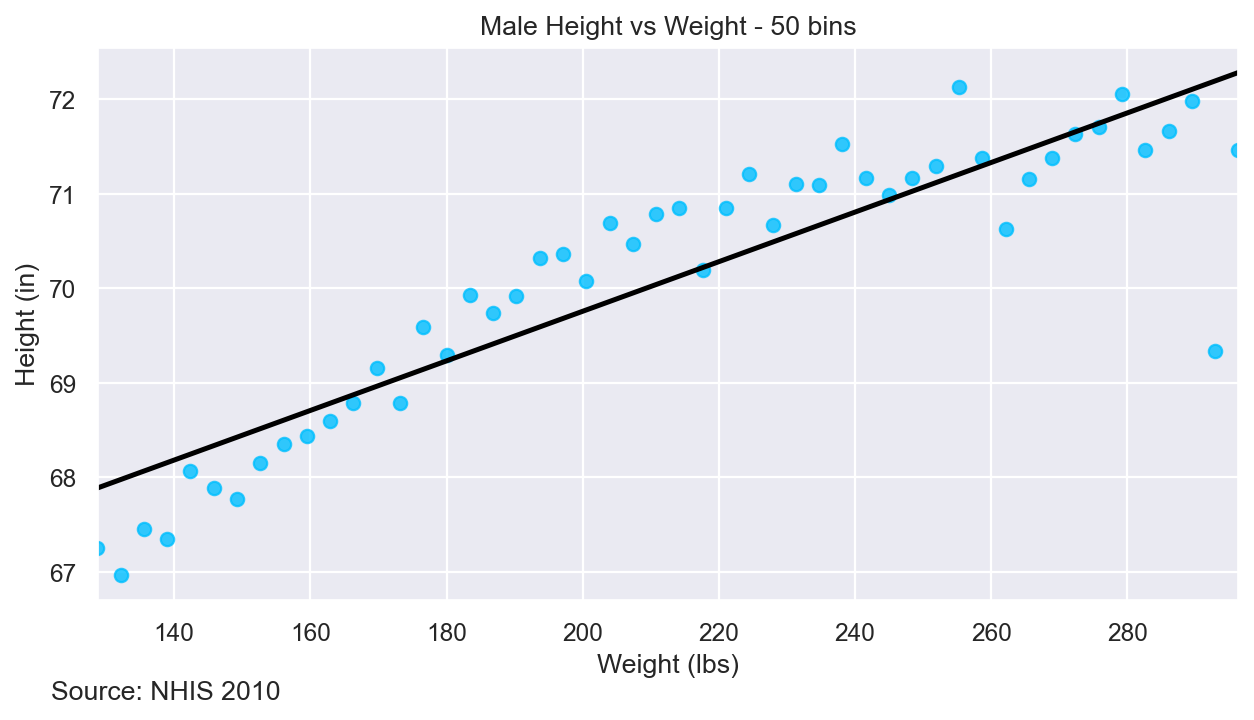

In [7]:
palette = {'Male': 'deepskyblue', 'Female': 'magenta'}

fig = plt.figure()
sns.regplot(data = df.loc[df.gender == 'Male'], x = 'weight', y = 'height',
            scatter_kws = {'color': 'deepskyblue'}, line_kws = {'color': 'black'}, ci = None)

plt.title('Male Height vs Weight - 50 bins')
fig.text(0.05, 0.01, 'Source: NHIS 2010', ha='left')
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (in)')

plt.tight_layout()

plt.savefig('height vs weight m')

In [8]:
x = sm.add_constant(male['weight'])
y = male.height

fit = sm.OLS(y, x).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     2038.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:52:07   Log-Likelihood:                -26412.
No. Observations:               11034   AIC:                         5.283e+04
Df Residuals:                   11032   BIC:                         5.284e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.3872      0.142    447.458      0.0

In [9]:
gm = pd.read_csv('gapminder.csv')
gm = gm.loc[:, gm.columns.str.endswith('2007')]
gm.columns = gm.columns.str[:-5]
gm['l_gdpPercap'] = np.log(gm.gdpPercap)

gmx = sm.add_constant(gm.l_gdpPercap)
gmy = gm.lifeExp

fit_gm = sm.OLS(gmy, gmx).fit()
print(fit_gm.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     265.2
Date:                Fri, 12 Feb 2021   Prob (F-statistic):           4.12e-34
Time:                        19:52:07   Log-Likelihood:                -479.26
No. Observations:                 142   AIC:                             962.5
Df Residuals:                     140   BIC:                             968.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.9496      3.858      1.283      

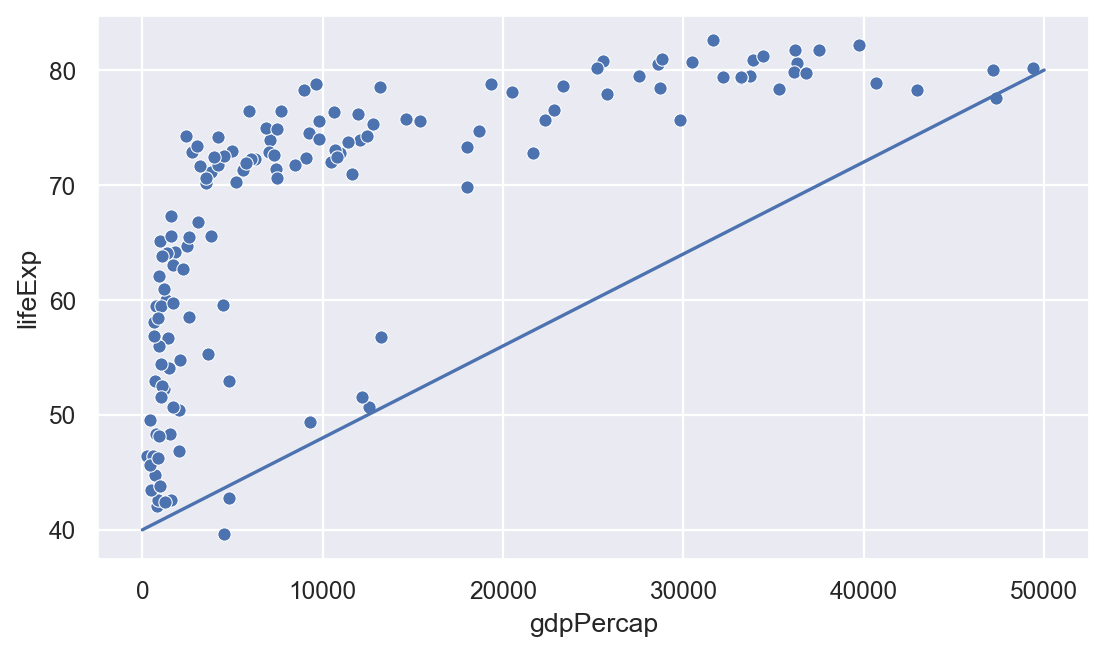

In [10]:
sns.scatterplot(data = gm, x = 'gdpPercap', y = 'lifeExp')
plt.plot([0, 50000], [40, 80])

In [11]:
acs = pd.read_pickle('C:/Users/johnj/Documents/Data/aml in econ spring 2021/homework data/acs mincer.pkl')
acs.head()

,incwage,yos,experience,female
3,65000,12,28,0
9,78000,12,46,0
11,19200,13,6,0
12,19100,12,5,1
13,35000,16,13,1


In [12]:
acs.columns

Index(['incwage', 'yos', 'experience', 'female'], dtype='object')

In [13]:
y = np.log(acs.incwage)
x = sm.add_constant(acs[['yos', 'experience']])
x['experience2'] = np.square(acs.experience)
x = x.join(acs.female)
x.head()

,const,yos,experience,experience2,female
3,1.0,12,28,784,0
9,1.0,12,46,2116,0
11,1.0,13,6,36,0
12,1.0,12,5,25,1
13,1.0,16,13,169,1


In [14]:
fit_mincer = sm.OLS(y, x).fit()
print(fit_mincer.summary())

                            OLS Regression Results                            
Dep. Variable:                incwage   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                 1.548e+05
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:52:09   Log-Likelihood:            -1.9637e+06
No. Observations:             1357772   AIC:                         3.927e+06
Df Residuals:                 1357767   BIC:                         3.927e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.3330      0.005   1568.830      

In [15]:
acs.experience.describe().round().astype(int)

count    1357772
mean          22
std           13
min           -5
25%           10
50%           22
75%           33
max           58
Name: experience, dtype: int32

In [16]:
exp_betas = np.array(fit_mincer.params[[2,3]])

In [17]:
-exp_betas[0]/(2*exp_betas[1])

30.594481786815052

In [18]:
x_plot = np.array([np.min(acs.experience), np.max(acs.experience)])
y_plot = exp_betas[0] + 2*exp_betas[1]*x_plot

In [19]:
round(-exp_betas[0]/(2*exp_betas[1]), 1)

30.6

In [20]:
me = round(np.mean(acs.experience))
print(me)
exp_betas[0] + 2*exp_betas[1]*me

22


0.030214847355548136

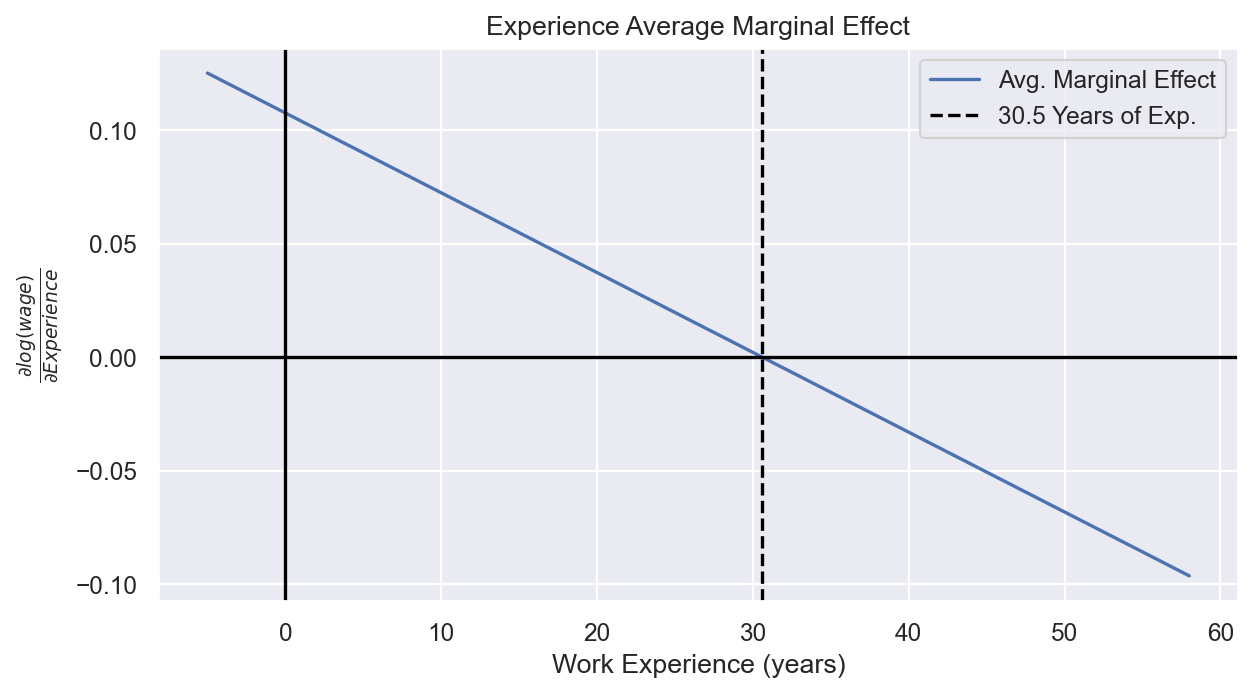

In [21]:
fig = sns.lineplot(x = x_plot, y = y_plot, label = 'Avg. Marginal Effect')
fig.axhline(0, color = 'black')
fig.axvline(0, color = 'black')
fig.axvline(-exp_betas[0]/(2*exp_betas[1]), color = 'black', linestyle = '--', label = '30.5 Years of Exp.')

plt.title('Experience Average Marginal Effect')
plt.xlabel('Work Experience (years)')
plt.ylabel('$\\frac{\\partial log(wage)}{\\partial Experience}$')
plt.legend()

plt.tight_layout()
plt.savefig('Experience Avg Marginal Effect')

******
# RMSE scale 

In [24]:
from sklearn.model_selection import train_test_split

In [36]:
train, test = train_test_split(acs, train_size = 0.5, random_state = 490)

In [47]:
x = sm.add_constant(male['weight'])
y = male.height

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.5, random_state = 490)

In [60]:
fit1 = sm.OLS(y_train, x_train).fit()

rmse1 = np.sqrt(np.mean(  (y_test - fit1.predict(x_test))**2  ))
rmse1

2.646775412975315

In [50]:
y_train2 = y_train*10
y_test2  = y_test*10

fit2 = sm.OLS(y_train2, x_train).fit()

np.sqrt(np.mean(  (y_test2 - fit2.predict(x_test))**2  ))

26.467754129753143

In [59]:
rmse_null = np.sqrt(np.mean(  (y_test - np.mean(y_train))**2)  )
rmse_null

2.8997951935574315

In [64]:
100*(rmse1 - rmse_null)/rmse_null

-8.725436235781705

In [63]:
rmse1

2.646775412975315